# Week 3 homework.

This notebook contains assignments for week 3 classifying bank data

In [66]:
## Import the modules needed for the analys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

import seaborn as sns

%matplotlib inline

### Download and load the data

Download the data and read it in using pandas

In [67]:
#!wget  'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
#!ls bank_marketing/bank

In [68]:
## read in the data
df = pd.read_csv('bank_marketing/bank/bank-full.csv')

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [70]:
## get the columns needed for the analysis
column_needed = ['age', 'job','marital','education','balance','housing',
'contact','day','month','duration','campaign','pdays','previous','poutcome','y']


In [71]:
bank_data = df[column_needed]

In [72]:
bank_data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [73]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [74]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1
What is the most frequent observation (mode) for the column education?

- unknown
- primary
- secondary
- tertiary

In [75]:
## Option one get the mode
bank_data.education.mode()

0    secondary
Name: education, dtype: object

In [76]:
## Option two get the counts for each values
bank_data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- age and balance
- day and campaign
- day and pdays
- pdays and previous

In [77]:
## get int values
numeric_features = list(bank_data.dtypes[bank_data.dtypes == 'int64'].index)

numeric_feature_data = bank_data[numeric_features]

In [78]:
numeric_feature_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [79]:
Corr = numeric_feature_data.corr(method='pearson')
Corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

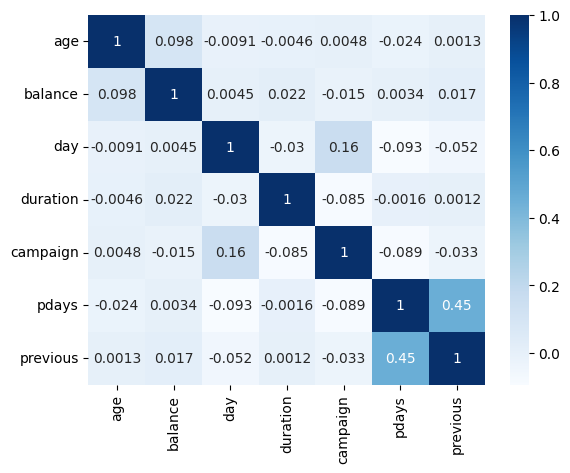

In [80]:
sns.heatmap(Corr, cmap='Blues', annot=True)

### Target encoding

- Now we want to encode the y variable.
- Let's replace the values yes/no with 1/0.

In [81]:
#bank_data['y'] = df['y'].map({'yes': 1, 'no': 0})
bank_data.y = (bank_data.y == 'yes').astype(int)

/var/folders/js/95x7pm0d46d9qsgdhmvy56400000gn/T/ipykernel_64904/1063555292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data.y = (bank_data.y == 'yes').astype(int)


In [82]:
bank_data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [83]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

### Split the data
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.

In [84]:
## Spliting the data. Note the len of the bank_data is not divisible by 3 so a slight different in the test and validation
df_full_train, df_test = train_test_split(bank_data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_test), len(df_val), len(df_train) + len(df_test)+ len(df_val), len(bank_data)


(27126, 9043, 9042, 45211, 45211)

In [85]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [86]:
y_train = df_train.y.values
y_test = df_test.y.values
y_val = df_val.y.values

### EDA

In [87]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0


In [88]:
## Use the train_full for EDA
df_full_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3344,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown,0
17965,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown,0
18299,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown,0
10221,37,management,single,tertiary,-119,yes,unknown,11,jun,375,11,-1,0,unknown,0
32192,56,blue-collar,married,primary,3498,no,cellular,15,apr,264,2,-1,0,unknown,1


In [89]:
df_full_train.y.value_counts()

y
0    31970
1     4198
Name: count, dtype: int64

In [90]:
df_full_train.y.value_counts(normalize=True)

y
0    0.883931
1    0.116069
Name: proportion, dtype: float64

In [91]:
y_rate = df_full_train.y.mean()

#### y rate with variables

In [92]:
df_full_train.dtypes[df_full_train.dtypes == 'object'].index

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome'],
      dtype='object')

In [93]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

In [94]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome']

In [95]:
maried_y = df_full_train[df_full_train.marital == 'married'].y.mean()
single_y = df_full_train[df_full_train.marital == 'single'].y.mean()
print(maried_y, single_y)

0.10057787561915245 0.14763721749339595


In [96]:
primary_y = df_full_train[df_full_train.education == 'primary'].y.mean()
secondary_y = df_full_train[df_full_train.education == 'secondary'].y.mean()
print(primary_y, secondary_y)

0.08637691745799854 0.1053026245313337


In [97]:
from IPython.display import display

In [98]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - y_rate
    df_group['risk'] = df_group['mean'] / y_rate
    display(df_group)
    print()

job


,mean,count,diff,risk
job,,,,
admin.,0.119894,4137,0.003824,1.032947
blue-collar,0.072252,7806,-0.043817,0.622490
entrepreneur,0.086587,1178,-0.029482,0.745997
housemaid,0.093812,1002,-0.022257,0.808243
management,0.135467,7500,0.019397,1.167117
retired,0.222590,1815,0.106520,1.917727
self-employed,0.122862,1286,0.006792,1.058518
services,0.090746,3350,-0.025323,0.781827
student,0.278976,742,0.162906,2.403524



marital


,mean,count,diff,risk
marital,,,,
divorced,0.119720,4143,0.003651,1.031451
married,0.100578,21804,-0.015492,0.866532
single,0.147637,10221,0.031568,1.271973



education


,mean,count,diff,risk
education,,,,
primary,0.086377,5476,-0.029693,0.744183
secondary,0.105303,18670,-0.010767,0.907238
tertiary,0.148970,10539,0.032901,1.283460
unknown,0.127444,1483,0.011375,1.098001



housing


,mean,count,diff,risk
housing,,,,
no,0.166407,16033,0.050337,1.433683
yes,0.075987,20135,-0.040082,0.654669



contact


,mean,count,diff,risk
contact,,,,
cellular,0.148270,23464,0.032200,1.277422
telephone,0.137128,2319,0.021059,1.181431
unknown,0.038613,10385,-0.077456,0.332675



month


,mean,count,diff,risk
month,,,,
apr,0.202645,2344,0.086576,1.745895
aug,0.110954,4966,-0.005115,0.955932
dec,0.464481,183,0.348411,4.001749
feb,0.156723,2112,0.040654,1.350256
jan,0.098678,1135,-0.017391,0.850167
jul,0.091927,5537,-0.024142,0.792000
jun,0.098888,4318,-0.017181,0.851976
mar,0.516043,374,0.399973,4.445983
may,0.065219,10963,-0.050850,0.561900



poutcome


,mean,count,diff,risk
poutcome,,,,
failure,0.126891,3901,0.010821,1.093229
other,0.170341,1497,0.054271,1.467575
success,0.641322,1210,0.525253,5.525332
unknown,0.090392,29560,-0.025677,0.778779


## Question 3
- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2)

In [99]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.y)

In [100]:
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
poutcome,0.029533
month,0.025090
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


In [101]:
### Drop the y variable before the machine learning
del df_train['y']
del df_test['y']
del df_val['y']

## Question 4
- Now let's train a logistic regression
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
- What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

In [102]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [103]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [104]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [105]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9


## Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - age
    - balance
    - marital
    - previous

Note: The difference doesn't have to be positive.

In [106]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [110]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, (original_score - score)]

In [111]:
scores

,eliminated_feature,accuracy,difference
0,age,0.901128,-0.001128
1,job,0.900907,-0.000907
2,marital,0.901128,-0.001128
3,education,0.900796,-0.000796
4,balance,0.900796,-0.000796
5,housing,0.900464,-0.000464
6,contact,0.900686,-0.000686
7,day,0.901239,-0.001239
8,month,0.899801,0.000199
9,duration,0.890290,0.009710


In [172]:
min_score =(min(abs(scores.difference)))

In [177]:
scores.sort_values(by = 'difference')

,eliminated_feature,accuracy,difference
0,age,0.901128,-0.001128
2,marital,0.901128,-0.001128
4,balance,0.900796,-0.000796
6,contact,0.900686,-0.000686
10,campaign,0.900575,-0.000575
5,housing,0.900464,-0.000464
8,month,0.899801,0.000199
13,poutcome,0.894050,0.005950
9,duration,0.890290,0.009710


## Question 6
- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

Note: If there are multiple options, select the smallest C.

In [65]:
C_values = [0.01, 0.1, 1, 10, 100]
for i in C_values:
    print(i)
    dv = DictVectorizer(sparse=False)
    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', max_iter=1000, C=i, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
    
    accuracy = (accuracy_score(y_val, y_pred))
    print(f'Accuracy = {accuracy}')

0.01
Accuracy = 0.8978102189781022
0.1
Accuracy = 0.9007962840079629
1
Accuracy = 0.9012386640123866
10
Accuracy = 0.9009068790090687
100
Accuracy = 0.900353904003539
